# Dog Breed Prediction
*In this project we will see how to use Keras and Tensorflow to build,train,and test a convulutional Neural Network capable of indentifying the breed of dog in a supplied image.This is supervised learning problem,specifially multiclass classification problem*. 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumukhkunde","key":"c450fcf58bb45e94fd4b537ecf8767b5"}'}

In [ ]:
#Next install the kaggle api client
!pip install -q kaggle

In [ ]:
#This Kaggle API client expects this files to be in ~/kaggle 
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/
#this permission change avoids a warning on kaggle tool setup
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#creating directory and changing the current working directory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
#searching the dataset
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  
---------------------------------  ----------------------  -----  -------------------  -------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05             90  


In [ ]:
#downloading datasets and comimg out dictionary
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 99% 681M/691M [00:21<00:00, 38.2MB/s]
100% 691M/691M [00:21<00:00, 34.1MB/s]
/content


In [ ]:
#unzipping download file and removing unusable files
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [ ]:
#importing nesscessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [ ]:
#Read the  labels.csv file and checking shape and records
labels_all=pd.read_csv('dog_dataset/labels.csv')
print(labels_all.shape)
print(labels_all.head())

(10222, 2)
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
#Visulize the number of each breed
breed_all=labels_all['breed']
breed_counts=breed_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [ ]:
#selecting first 3 breed
CLASS_NAMES=['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels=labels_all[labels_all['breed'].isin(CLASS_NAMES)]
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [ ]:
#Creating numpy matrix with zeroes
X_data=np.zeros((len(labels),224,224,3),dtype='float32')
#One Hot Encoding
Y_data=label_binarize(labels['breed'],classes=CLASS_NAMES)
#Reading the converting image to numpy array and normalize dataset
for i in tqdm(range(len(labels))):
  img=image.load_img('dog_dataset/train/%s.jpg' %labels['id'][i],target_size=(224,224))
  img=image.img_to_array(img)
  x=np.expand_dims(img.copy(),axis=0)
  X_data[i]=x/255.0

#printing train image and one hot encode shape and size
print('\nTrain image shape:', X_data.shape,'size:{:,}'.format(X_data.size))
print('One Hot encoded output shape:',Y_data.shape,'size{:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:01<00:00, 241.70it/s]


Train image shape: (357, 224, 224, 3) size:53,738,496
One Hot encoded output shape: (357, 3) size1,071


# As we are working with the classification dataset first we need to one hot encode the target value i.e the classes.after that  we will read images and convert them into numpy array and finally normalized the  array

In [ ]:
#Building the model  
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(7,7),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(5,5),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model.add(Dense(len(CLASS_NAMES),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 8)        

In [ ]:
#After defining the network architecture we found the total parameter is 162619

In [ ]:
#splitting the data set into training and testing dataset
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.1)
#Splitting the data set into training and validation dataset



In [ ]:
epochs=100
batch_size=128

history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,
                  validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 41s 16s/step - loss: 4.8773 - accuracy: 0.3359 - val_loss: 4.8590 - val_accuracy: 0.3385
Epoch 2/100
2/2 [==============================] - 30s 16s/step - loss: 4.8513 - accuracy: 0.3750 - val_loss: 4.8337 - val_accuracy: 0.3077
Epoch 3/100
2/2 [==============================] - 30s 16s/step - loss: 4.8253 - accuracy: 0.4414 - val_loss: 4.8087 - val_accuracy: 0.4154
Epoch 4/100
2/2 [==============================] - 32s 18s/step - loss: 4.8000 - accuracy: 0.4648 - val_loss: 4.7841 - val_accuracy: 0.4308
Epoch 5/100
2/2 [==============================] - 30s 16s/step - loss: 4.7744 - accuracy: 0.4766 - val_loss: 4.7597 - val_accuracy: 0.4462
Epoch 6/100
2/2 [==============================] - 29s 16s/step - loss: 4.7491 - accuracy: 0.4883 - val_loss: 4.7357 - val_accuracy: 0.4615
Epoch 7/100
2/2 [==============================] - 30s 15s/step - loss: 4.7239 - accuracy: 0.4844 - val_loss: 4.7116 - val_accuracy: 0.4308
Epoch 8/100
2/2 [===

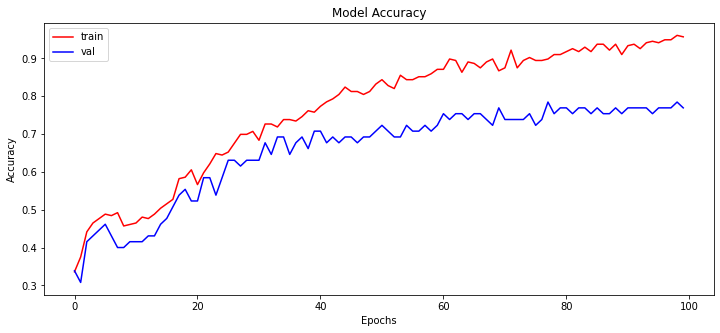

In [ ]:
#Plot the training History
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

# Here we analyze the how the model is running with each epochs in term of accuracy

In [ ]:
Y_pred=model.predict(X_test)
score=model.evaluate(X_test,Y_test)
print('Accuracy over the test set:\n',round((score[1]*100),2),'%')

2/2 [==============================] - 1s 119ms/step - loss: 3.4581 - accuracy: 0.7500
Accuracy over the test set:
 75.0 %


In [ ]:
#*we will use the predict function to make prediction using this model also finding accuracy over test set*

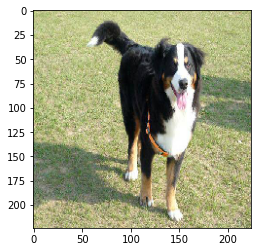

Originally: maltese_dog
Predicted: scottish_deerhound


In [29]:
#plotting image to comapare
plt.imshow(X_test[1,:,:,:])
plt.show()

#Finding max value from prediction list and compare original value as  predicted
print('Originally:',labels['breed'][np.argmax(Y_test[5])])
print('Predicted:',labels['breed'][np.argmax(Y_pred[1])])